# A demo process for parameter guidelines

This is a walkthough of major steps from the actual parameter user guide.
## Overview
1. user uploads their data and choose a target
2. process shows the feature importance for the chosen target
3. user chooses which attributes to mark
4. the process fingerprints the data
5. the process shows the obtained utility via mean, variance and performance on different ML classifiers as a function of number of marks
6. the process shows robustness against the attacks as a function of number of marks

(ideally, the process now finds some correlations between the dataset characteristics and obtained quality)

In [4]:
import os
import pandas as pd
import numpy as np

In [5]:
os.chdir("C:\\Users\\tsarcevic\\PycharmProjects\\fingerprinting-toolbox")

In [6]:
from datasets import BreastCancerWisconsin

In [7]:
data = BreastCancerWisconsin()

In [5]:
data.get_dataframe().head()

,sample-code-number,clump-thickness,uniformity-of-cell-size,uniformity-of-cell-shape,marginal-adhesion,single-epithelial-cell-size,bare-nuclei,bland-chromatin,normal-nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
# todo: feature importance

In [13]:
from scheme import AKScheme

In [8]:
gamma = 1
fplen = 8
sk = 341

In [9]:
scheme = AKScheme(gamma=gamma, fingerprint_bit_length=fplen)
fingerprinted_data = scheme.insertion(dataset=data, recipient_id=1, secret_key=sk)

Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 10001011
Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 84 times
Time: <1 sec.


In [10]:
fingerprinted_data.get_dataframe()

,sample-code-number,clump-thickness,uniformity-of-cell-size,uniformity-of-cell-shape,marginal-adhesion,single-epithelial-cell-size,bare-nuclei,bland-chromatin,normal-nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,2,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
678,776715,3,1,1,1,3,2,1,1,1,2
679,841769,2,1,1,0,2,1,1,1,1,2
680,888820,5,10,10,3,7,3,8,10,2,4
681,897471,4,9,6,4,3,4,10,6,1,4


In [11]:
# todo: implement some kind of summary or show differences or something like that
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Marked values per column')

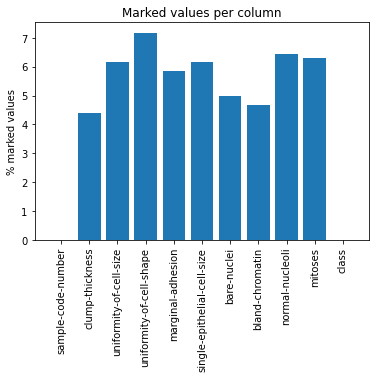

In [14]:
percentage = {}
for index in range(len(data.columns)):
    original = data.dataframe[data.columns[index]]
    fingerprinted = fingerprinted_data.dataframe[data.columns[index]]
    num_of_changes = len(original.compare(fingerprinted))
    percentage[data.columns[index]] = (num_of_changes / len(data.dataframe)) * 100
plt.bar(percentage.keys(), percentage.values())
plt.xticks(rotation=90)
plt.ylabel('% marked values')
plt.title('Marked values per column')

In [15]:
percentage

{'sample-code-number': 0.0,
 'clump-thickness': 4.392386530014641,
 'uniformity-of-cell-size': 6.149341142020498,
 'uniformity-of-cell-shape': 7.174231332357247,
 'marginal-adhesion': 5.856515373352855,
 'single-epithelial-cell-size': 6.149341142020498,
 'bare-nuclei': 4.978038067349927,
 'bland-chromatin': 4.685212298682284,
 'normal-nucleoli': 6.44216691068814,
 'mitoses': 6.295754026354319,
 'class': 0.0}

In [16]:
import numpy as np

In [18]:
# change in mean
mean_original = [np.mean(data.dataframe[attribute]) for attribute in data.dataframe]
mean_fingerprint = [np.mean(fingerprinted_data.dataframe[attribute]) for attribute in fingerprinted_data.dataframe]
delta_mean = [fp - org for fp, org in zip(mean_fingerprint, mean_original)]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

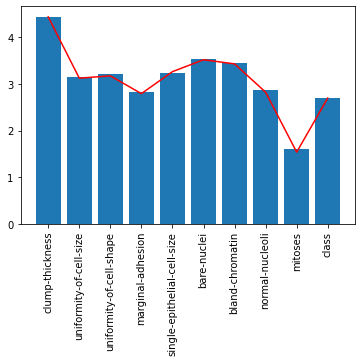

In [19]:
plt.plot(mean_fingerprint[1:], color='red')
plt.bar(data.columns[1:], mean_original[1:])
plt.xticks(rotation=90)

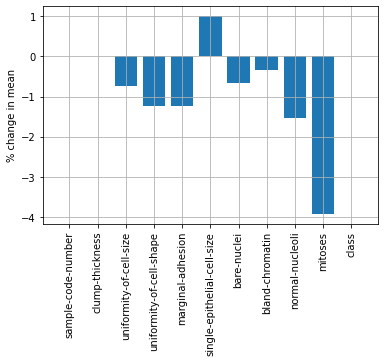

In [20]:
plt.bar(data.columns, [(diff/mean)*100  for diff, mean in zip(delta_mean, mean_original)])
plt.xticks(rotation=90)
plt.ylabel('% change in mean')
plt.grid()

In [22]:
# change in variance
var_original = [np.var(data.dataframe[attribute]) for attribute in data.dataframe]
var_fingerprint = [np.var(fingerprinted_data.dataframe[attribute]) for attribute in fingerprinted_data.dataframe]
delta_var = [fp - org for fp, org in zip(var_fingerprint, var_original)]

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

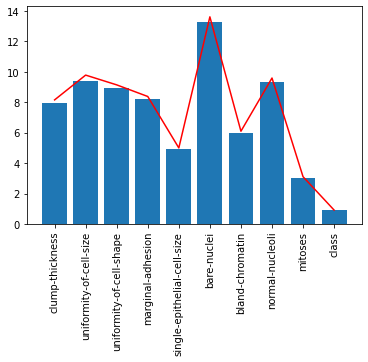

In [23]:
plt.plot(var_fingerprint[1:], color='red')
plt.bar(data.columns[1:], var_original[1:])
plt.xticks(rotation=90)

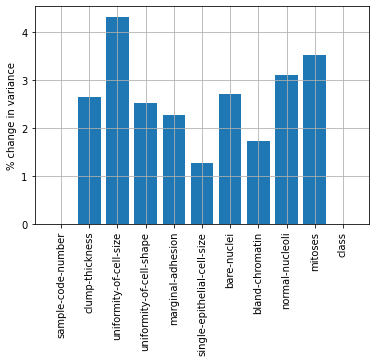

In [24]:
plt.bar(data.columns, [(diff/var)*100  for diff, var in zip(delta_var, var_original)])
plt.xticks(rotation=90)
plt.ylabel('% change in variance')
plt.grid()

This shall be ran on n fingerprinted datasets and recorded the mean of all the means/variances, plus we can plot the variance of these values.

## Utility as ML performance
Classifiers:
1. Decision Tree
2. Logistic Regression
3. SVM 
4. Boosting algorithm
5. Random Forest
6. KNN
7. Perceptron

We do only the necessary preprocessing (categorical to numerical, normalization where necessary). 
- how do we know that this properly reflects the behaviour? We don't but we assume. 
- how to actually choose the baseline? Should we do a minimal random/grid search for the hyperparameters? Probably a good idea. 

### Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

In [26]:
model = DecisionTreeClassifier(random_state=0)

In [27]:
X = data.get_features()
y = data.get_target()

In [28]:
# performance on the original data via 5-fold cross validation
score = cross_val_score(model, X, y, cv=5)
print(score)

[0.91240876 0.9270073  0.94890511 0.96323529 0.93382353]


In [29]:
X_fp = fingerprinted_data.get_features()
y_fp = fingerprinted_data.get_target()

In [30]:
from utils import *
from pprint import pprint

In [31]:
fp_score = fp_cross_val_score(model, X, y, X_fp, y_fp, cv=5)
pprint(fp_score)

{'fit_time': array([0.00903726, 0.00503349, 0.00295782, 0.00300217, 0.00299048]),
 'score_time': array([0.00196481, 0.00096512, 0.0020349 , 0.00204444, 0.00200057]),
 'test_score': array([0.88321168, 0.9270073 , 0.90510949, 0.97058824, 0.93382353])}


In [32]:
diff = np.mean(fp_score['test_score']) - np.mean(score)
print(diff)

-0.013127951910691271


This is just one iteration. In the real evaluation, the experiment has to be repeated 100+ times. I.e.:
- fingeprint the data with a distinct secret key
- evaluate the performance via cross validation
- repeat 1 and 2 many times and average it out

### Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
model = LogisticRegression(random_state=0)

In [35]:
# original score
score = cross_val_score(model, X, y, cv=5)
print(score)

[0.94160584 0.94160584 0.98540146 0.97794118 0.98529412]


In [37]:
# fingerprinted score
fp_score = fp_cross_val_score(model, X, y, X_fp, y_fp, cv=5)

In [38]:
diff = np.mean(fp_score['test_score']) - np.mean(score)
print(diff)

-0.0014705882352940014


Again, the experiment needs to be repeated n times. Also, the same workflow will follow for other classifiers. 

Let us now try to show the entire evaluation on one of the classifiers, e.g. kNN.

### kNN

In [39]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
model = KNeighborsClassifier()  # default k = 5

In [41]:
# score the original model
score = cross_val_score(model, X, y, cv=5)
print(score)

[0.93430657 0.94890511 0.98540146 0.99264706 0.98529412]


In [42]:
n_fingerprints = 10

In [45]:
fingerprinted_datasets = []
score_diff = []
for embedding_idx in range(n_fingerprints):
    sk = embedding_idx*3  # just a dummy value
    # define the scheme - everything stays fixed except for the secret key sk
    scheme = AKScheme(gamma, fplen)
    fingerprinted_data = scheme.insertion(dataset=data, recipient_id=1, secret_key=sk)
    fingerprinted_datasets.append(fingerprinted_data)
    
    # split target and features
    X_fp = fingerprinted_data.get_features()
    y_fp = fingerprinted_data.get_target()
    
    # define the model and evaluate
    model = KNeighborsClassifier()
    
    # score the fingerprinted model
    fp_score = fp_cross_val_score(model, X, y, X_fp, y_fp, cv=5)
    
    # calculate the difference
    diff = np.mean(fp_score['test_score']) - np.mean(score)
    score_diff.append(diff)

Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 01011111
Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 86 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 10100100
Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 87 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 01110111
Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 96 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 01100001
Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 91 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 01011100
Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 98 times
Time: <1 sec.


In [46]:
score_diff

[-0.0014598540145985828,
 0.0,
 -0.004390296264491278,
 -0.004390296264491278,
 0.0,
 0.0014705882352942234,
 -0.004411764705882448,
 -0.002930442249892695,
 -0.0014705882352942234,
 -1.0734220695640673e-05]

How much of utility loss do we have with a certain gamma value for kNN?

In [47]:
np.mean(score_diff)

-0.0017593387720051922

Now let's see that loss for a range of gamma values (hypothesis is that with a smaller gamma (increased number of values), decreases in utility are bigger)

In [53]:
gammae = [i for i in range(1, 7)]
results = {g: [] for g in gammae}

n_fingerprints = 100
for gamma in gammae:
    for embedding_idx in range(n_fingerprints):
        sk = embedding_idx*3  # just a dummy value
        # define the scheme - everything stays fixed except for the secret key sk
        scheme = AKScheme(gamma=gamma, fingerprint_bit_length=fplen)
        fingerprinted_data = scheme.insertion(dataset=data, recipient_id=1, secret_key=sk)

        # split target and features
        X_fp = fingerprinted_data.get_features()
        y_fp = fingerprinted_data.get_target()

        # define the model and evaluate
        model = KNeighborsClassifier()

        # score the fingerprinted model
        fp_score = fp_cross_val_score(model, X, y, X_fp, y_fp, cv=5)

        # calculate the difference
        diff = np.mean(fp_score['test_score']) - np.mean(score)
        results[gamma].append(diff)

Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 01011111
Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 86 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 10100100
Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 87 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 01110111
Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 96 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 01100001
Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 91 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 01011100
Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 98 times
Time: <1 sec.


Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 01110011
Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 82 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 11110101
Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 98 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 00010100
Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 79 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 01110101
Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 100 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 01000100
Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 110 times
Time: <1 sec

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 96 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 00010011
Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 102 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 10011011
Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 81 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 10110100
Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 83 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 01110101
Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 87 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 00000011

Fingerprint inserted.
	marked tuples: ~49.19%
	single fingerprint bit embedded 52 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for recipient 1: 01010010
Fingerprint inserted.
	marked tuples: ~51.83%
	single fingerprint bit embedded 44 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for recipient 1: 11101001
Fingerprint inserted.
	marked tuples: ~50.07%
	single fingerprint bit embedded 39 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for recipient 1: 00001000
Fingerprint inserted.
	marked tuples: ~53.73%
	single fingerprint bit embedded 42 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for recipient 1: 01111111
Fingerprint inserted.
	marked tuples: ~48.02%
	single fingerprint bit embedded 37 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for recipient 1: 01000100


Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for recipient 1: 10001011
Fingerprint inserted.
	marked tuples: ~51.239999999999995%
	single fingerprint bit embedded 41 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for recipient 1: 00100010
Fingerprint inserted.
	marked tuples: ~54.03%
	single fingerprint bit embedded 38 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for recipient 1: 01110000
Fingerprint inserted.
	marked tuples: ~50.51%
	single fingerprint bit embedded 35 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for recipient 1: 00001110
Fingerprint inserted.
	marked tuples: ~47.58%
	single fingerprint bit embedded 38 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for recipient 1: 00010100
Fingerprint inserted.
	marked tuples: ~52.12%
	single fingerprint bit embedded 49 times
T

Fingerprint inserted.
	marked tuples: ~33.09%
	single fingerprint bit embedded 35 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 3
	xi: 1

Generated fingerprint for recipient 1: 01001100
Fingerprint inserted.
	marked tuples: ~30.599999999999998%
	single fingerprint bit embedded 22 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 3
	xi: 1

Generated fingerprint for recipient 1: 01000110
Fingerprint inserted.
	marked tuples: ~35.43%
	single fingerprint bit embedded 35 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 3
	xi: 1

Generated fingerprint for recipient 1: 10101111
Fingerprint inserted.
	marked tuples: ~33.239999999999995%
	single fingerprint bit embedded 19 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 3
	xi: 1

Generated fingerprint for recipient 1: 01110011
Fingerprint inserted.
	marked tuples: ~31.19%
	single fingerprint bit embedded 20 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 3
	xi: 1

Generated fingerprint 

Start AK insertion algorithm...
	gamma: 3
	xi: 1

Generated fingerprint for recipient 1: 11010111
Fingerprint inserted.
	marked tuples: ~33.67%
	single fingerprint bit embedded 27 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 3
	xi: 1

Generated fingerprint for recipient 1: 00111111
Fingerprint inserted.
	marked tuples: ~32.940000000000005%
	single fingerprint bit embedded 24 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 3
	xi: 1

Generated fingerprint for recipient 1: 10100100
Fingerprint inserted.
	marked tuples: ~35.43%
	single fingerprint bit embedded 35 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 3
	xi: 1

Generated fingerprint for recipient 1: 10010110
Fingerprint inserted.
	marked tuples: ~31.630000000000003%
	single fingerprint bit embedded 20 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 3
	xi: 1

Generated fingerprint for recipient 1: 10111101
Fingerprint inserted.
	marked tuples: ~33.09%
	single fingerprint bit embedd

Start AK insertion algorithm...
	gamma: 3
	xi: 1

Generated fingerprint for recipient 1: 11010110
Fingerprint inserted.
	marked tuples: ~28.549999999999997%
	single fingerprint bit embedded 18 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 3
	xi: 1

Generated fingerprint for recipient 1: 11011111
Fingerprint inserted.
	marked tuples: ~33.09%
	single fingerprint bit embedded 29 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 3
	xi: 1

Generated fingerprint for recipient 1: 01111001
Fingerprint inserted.
	marked tuples: ~37.480000000000004%
	single fingerprint bit embedded 29 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 3
	xi: 1

Generated fingerprint for recipient 1: 11111000
Fingerprint inserted.
	marked tuples: ~31.19%
	single fingerprint bit embedded 27 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 3
	xi: 1

Generated fingerprint for recipient 1: 11001111
Fingerprint inserted.
	marked tuples: ~35.72%
	single fingerprint bit embedd

Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for recipient 1: 11000011
Fingerprint inserted.
	marked tuples: ~25.180000000000003%
	single fingerprint bit embedded 31 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for recipient 1: 10011011
Fingerprint inserted.
	marked tuples: ~26.650000000000002%
	single fingerprint bit embedded 26 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for recipient 1: 01111111
Fingerprint inserted.
	marked tuples: ~22.84%
	single fingerprint bit embedded 19 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for recipient 1: 11111101
Fingerprint inserted.
	marked tuples: ~22.84%
	single fingerprint bit embedded 16 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for recipient 1: 11000111
Fingerprint inserted.
	marked tuples: ~22.400000000000002%
	single fingerpri

Fingerprint inserted.
	marked tuples: ~23.43%
	single fingerprint bit embedded 20 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for recipient 1: 10001010
Fingerprint inserted.
	marked tuples: ~25.480000000000004%
	single fingerprint bit embedded 22 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for recipient 1: 11010010
Fingerprint inserted.
	marked tuples: ~27.38%
	single fingerprint bit embedded 20 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for recipient 1: 11011010
Fingerprint inserted.
	marked tuples: ~23.28%
	single fingerprint bit embedded 19 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for recipient 1: 01110110
Fingerprint inserted.
	marked tuples: ~27.229999999999997%
	single fingerprint bit embedded 27 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint 

Fingerprint inserted.
	marked tuples: ~21.08%
	single fingerprint bit embedded 16 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 5
	xi: 1

Generated fingerprint for recipient 1: 01110011
Fingerprint inserted.
	marked tuples: ~21.38%
	single fingerprint bit embedded 13 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 5
	xi: 1

Generated fingerprint for recipient 1: 00011000
Fingerprint inserted.
	marked tuples: ~17.86%
	single fingerprint bit embedded 10 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 5
	xi: 1

Generated fingerprint for recipient 1: 01110000
Fingerprint inserted.
	marked tuples: ~18.3%
	single fingerprint bit embedded 8 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 5
	xi: 1

Generated fingerprint for recipient 1: 00101111
Fingerprint inserted.
	marked tuples: ~19.03%
	single fingerprint bit embedded 15 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 5
	xi: 1

Generated fingerprint for recipient 1: 01001110
Fi

Start AK insertion algorithm...
	gamma: 5
	xi: 1

Generated fingerprint for recipient 1: 10111110
Fingerprint inserted.
	marked tuples: ~22.400000000000002%
	single fingerprint bit embedded 16 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 5
	xi: 1

Generated fingerprint for recipient 1: 00110001
Fingerprint inserted.
	marked tuples: ~16.98%
	single fingerprint bit embedded 16 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 5
	xi: 1

Generated fingerprint for recipient 1: 10110111
Fingerprint inserted.
	marked tuples: ~18.740000000000002%
	single fingerprint bit embedded 13 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 5
	xi: 1

Generated fingerprint for recipient 1: 00001000
Fingerprint inserted.
	marked tuples: ~20.79%
	single fingerprint bit embedded 11 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 5
	xi: 1

Generated fingerprint for recipient 1: 01100100
Fingerprint inserted.
	marked tuples: ~21.52%
	single fingerprint bit embedd

Fingerprint inserted.
	marked tuples: ~18.45%
	single fingerprint bit embedded 19 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 5
	xi: 1

Generated fingerprint for recipient 1: 10011001
Fingerprint inserted.
	marked tuples: ~19.77%
	single fingerprint bit embedded 11 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 5
	xi: 1

Generated fingerprint for recipient 1: 10111110
Fingerprint inserted.
	marked tuples: ~21.08%
	single fingerprint bit embedded 19 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 5
	xi: 1

Generated fingerprint for recipient 1: 01101001
Fingerprint inserted.
	marked tuples: ~20.200000000000003%
	single fingerprint bit embedded 14 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 5
	xi: 1

Generated fingerprint for recipient 1: 10101111
Fingerprint inserted.
	marked tuples: ~21.52%
	single fingerprint bit embedded 19 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 6
	xi: 1

Generated fingerprint for recipient

Fingerprint inserted.
	marked tuples: ~17.419999999999998%
	single fingerprint bit embedded 11 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 6
	xi: 1

Generated fingerprint for recipient 1: 11010101
Fingerprint inserted.
	marked tuples: ~16.84%
	single fingerprint bit embedded 14 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 6
	xi: 1

Generated fingerprint for recipient 1: 00101111
Fingerprint inserted.
	marked tuples: ~16.54%
	single fingerprint bit embedded 15 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 6
	xi: 1

Generated fingerprint for recipient 1: 00001001
Fingerprint inserted.
	marked tuples: ~14.790000000000001%
	single fingerprint bit embedded 12 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 6
	xi: 1

Generated fingerprint for recipient 1: 01110011
Fingerprint inserted.
	marked tuples: ~17.72%
	single fingerprint bit embedded 15 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 6
	xi: 1

Generated fingerprint 


Generated fingerprint for recipient 1: 00011010
Fingerprint inserted.
	marked tuples: ~14.49%
	single fingerprint bit embedded 9 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 6
	xi: 1

Generated fingerprint for recipient 1: 00100001
Fingerprint inserted.
	marked tuples: ~17.28%
	single fingerprint bit embedded 12 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 6
	xi: 1

Generated fingerprint for recipient 1: 11100011
Fingerprint inserted.
	marked tuples: ~16.25%
	single fingerprint bit embedded 18 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 6
	xi: 1

Generated fingerprint for recipient 1: 00111101
Fingerprint inserted.
	marked tuples: ~14.790000000000001%
	single fingerprint bit embedded 19 times
Time: <1 sec.
Start AK insertion algorithm...
	gamma: 6
	xi: 1

Generated fingerprint for recipient 1: 00010011
Fingerprint inserted.
	marked tuples: ~17.57%
	single fingerprint bit embedded 18 times
Time: <1 sec.
Start AK insertion algorithm...
	gamm

Text(0, 0.5, 'Accuracy difference original - fingerprinted')

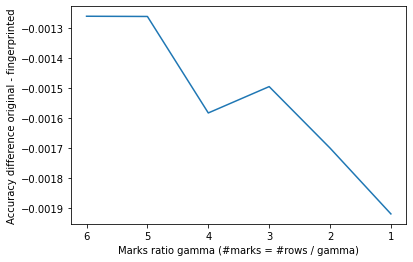

In [54]:
plt.plot(results.keys(), list(map(np.mean, results.values())))
plt.gca().invert_xaxis()
plt.xlabel('Marks ratio gamma (#marks = #rows / gamma)')
plt.ylabel('Accuracy difference original - fingerprinted')

## Robustness per se (extraction rate)

The goal here is to see the extraction rate of detection algorithm. For that, we vary the number of marks (ratio gamma) and repeat insertion+detection n times, for example 100. We watch the trends. Hopefully for some gamma the extraction rate gets to 100%. 

In [24]:
n_experiments = 100
gammae = [1, 2, 4, 7, 10, 50, 60, 70, 80, 90, 100]   # define the rule for possible gamma choices, i.e. #rows/(L*gamma) > 1
Ls = [8, 16]
results = {l: {g: 0 for g in gammae} for l in Ls}
for L in Ls:
    for gamma in gammae:
        for exp_idx in range(n_experiments):
            # fingerprint
            # xi, fplen and numbuyers is fixed
            sk = exp_idx*gamma  # just a random number but different every time
            scheme = AKScheme(gamma=gamma, fingerprint_bit_length=L)
            user = 1
            fingerprinted_data = scheme.insertion(dataset=data, recipient_id=user, secret_key=sk)

            # detect 
            suspect = scheme.detection(fingerprinted_data, secret_key=sk)

            # compare if it's correct 
            if suspect == user:
                results[L][gamma] += 1  # counts correct extractions
                # todo: count false attribution extractions (i.e. existing user but a wrong one)


Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 01011111
Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 86 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 01011111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 11110111
Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 97 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 11110111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 10111110
Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 99 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 10111110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi:

Fingerprint detected: 11100000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 00010111
Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 85 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 00010111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 10101111
Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 83 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 10101111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 01100011
Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 79 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 01100011
Buyer 1 is susp

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 84 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 01100000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 01001110
Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 70 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 01001110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 00110001
Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 98 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 00110001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 11111010
Fingerprint inserted.
	marked tuples: ~100.0%


Generated fingerprint for recipient 1: 11100001
Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 84 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 11100001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 11011011
Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 83 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 11011011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 00001000
Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 74 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 00001000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 0101100

Fingerprint detected: 11111100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for recipient 1: 01011100
Fingerprint inserted.
	marked tuples: ~50.660000000000004%
	single fingerprint bit embedded 44 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 01011100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for recipient 1: 10010100
Fingerprint inserted.
	marked tuples: ~47.73%
	single fingerprint bit embedded 37 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 10010100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for recipient 1: 11001001
Fingerprint inserted.
	marked tuples: ~54.03%
	single fingerprint bit embedded 43 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 11001001
Bu

Fingerprint inserted.
	marked tuples: ~46.71%
	single fingerprint bit embedded 42 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 11101100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for recipient 1: 00101111
Fingerprint inserted.
	marked tuples: ~49.19%
	single fingerprint bit embedded 45 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 00101111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for recipient 1: 11011110
Fingerprint inserted.
	marked tuples: ~50.949999999999996%
	single fingerprint bit embedded 49 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 11011110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for recipient 1: 10001100
Fingerprint inserted.
	marked tup

Fingerprint detected: 10110010
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for recipient 1: 10011000
Fingerprint inserted.
	marked tuples: ~49.49%
	single fingerprint bit embedded 37 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 10011000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for recipient 1: 00001001
Fingerprint inserted.
	marked tuples: ~51.239999999999995%
	single fingerprint bit embedded 44 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 00001001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for recipient 1: 10000010
Fingerprint inserted.
	marked tuples: ~50.51%
	single fingerprint bit embedded 38 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 10000010
Bu

Fingerprint inserted.
	marked tuples: ~52.27%
	single fingerprint bit embedded 48 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 10011110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for recipient 1: 01100000
Fingerprint inserted.
	marked tuples: ~52.12%
	single fingerprint bit embedded 54 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 01100000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for recipient 1: 00001000
Fingerprint inserted.
	marked tuples: ~54.03%
	single fingerprint bit embedded 45 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 00001000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for recipient 1: 01101000
Fingerprint inserted.
	marked tuples: ~49.34%


Fingerprint inserted.
	marked tuples: ~25.040000000000003%
	single fingerprint bit embedded 18 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 10100100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for recipient 1: 01110000
Fingerprint inserted.
	marked tuples: ~25.480000000000004%
	single fingerprint bit embedded 17 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 01110000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for recipient 1: 01101011
Fingerprint inserted.
	marked tuples: ~26.06%
	single fingerprint bit embedded 18 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 01101011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for recipient 1: 11111010
Fingerprint inserted

Fingerprint detected: 11110111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for recipient 1: 01101111
Fingerprint inserted.
	marked tuples: ~25.330000000000002%
	single fingerprint bit embedded 17 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 01101111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for recipient 1: 01111011
Fingerprint inserted.
	marked tuples: ~27.089999999999996%
	single fingerprint bit embedded 24 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 01111011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for recipient 1: 10011100
Fingerprint inserted.
	marked tuples: ~23.43%
	single fingerprint bit embedded 25 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected

Fingerprint detected: 01110010
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for recipient 1: 10000111
Fingerprint inserted.
	marked tuples: ~21.23%
	single fingerprint bit embedded 16 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 10000111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for recipient 1: 00001000
Fingerprint inserted.
	marked tuples: ~26.06%
	single fingerprint bit embedded 24 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 00001000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for recipient 1: 11110110
Fingerprint inserted.
	marked tuples: ~22.689999999999998%
	single fingerprint bit embedded 26 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 11110110
Bu

Fingerprint inserted.
	marked tuples: ~23.28%
	single fingerprint bit embedded 24 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 01010011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for recipient 1: 00001101
Fingerprint inserted.
	marked tuples: ~25.77%
	single fingerprint bit embedded 13 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 00001101
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for recipient 1: 00011110
Fingerprint inserted.
	marked tuples: ~24.6%
	single fingerprint bit embedded 21 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 00011110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for recipient 1: 01011101
Fingerprint inserted.
	marked tuples: ~25.77%
	

Fingerprint detected: 00010000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for recipient 1: 10110110
Fingerprint inserted.
	marked tuples: ~13.76%
	single fingerprint bit embedded 12 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 10110110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for recipient 1: 10100100
Fingerprint inserted.
	marked tuples: ~15.229999999999999%
	single fingerprint bit embedded 13 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 10100100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for recipient 1: 10011100
Fingerprint inserted.
	marked tuples: ~13.76%
	single fingerprint bit embedded 14 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 10011100
Bu

Fingerprint inserted.
	marked tuples: ~14.2%
	single fingerprint bit embedded 15 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 11110011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for recipient 1: 00100000
Fingerprint inserted.
	marked tuples: ~13.03%
	single fingerprint bit embedded 9 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 00100000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for recipient 1: 10101010
Fingerprint inserted.
	marked tuples: ~15.079999999999998%
	single fingerprint bit embedded 16 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 10101010
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for recipient 1: 11111111
Fingerprint inserted.
	marked tuple

Fingerprint inserted.
	marked tuples: ~14.2%
	single fingerprint bit embedded 15 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 01100001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for recipient 1: 01001101
Fingerprint inserted.
	marked tuples: ~13.91%
	single fingerprint bit embedded 7 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 01001101
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for recipient 1: 11011100
Fingerprint inserted.
	marked tuples: ~13.18%
	single fingerprint bit embedded 7 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 11011100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for recipient 1: 00011101
Fingerprint inserted.
	marked tuples: ~14.06%
	si

Fingerprint inserted.
	marked tuples: ~10.69%
	single fingerprint bit embedded 5 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 01011111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for recipient 1: 11111100
Fingerprint inserted.
	marked tuples: ~11.709999999999999%
	single fingerprint bit embedded 15 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 11111100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for recipient 1: 11110101
Fingerprint inserted.
	marked tuples: ~10.83%
	single fingerprint bit embedded 5 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 11110101
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for recipient 1: 01110011
Fingerprint inserted.
	marked

Fingerprint inserted.
	marked tuples: ~9.22%
	single fingerprint bit embedded 6 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 11011111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for recipient 1: 01000101
Fingerprint inserted.
	marked tuples: ~8.35%
	single fingerprint bit embedded 9 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 01000101
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for recipient 1: 10000100
Fingerprint inserted.
	marked tuples: ~9.81%
	single fingerprint bit embedded 8 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 10000100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for recipient 1: 00100100
Fingerprint inserted.
	marked tuples: ~10.1000

Fingerprint inserted.
	marked tuples: ~10.69%
	single fingerprint bit embedded 9 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 11110011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for recipient 1: 11101110
Fingerprint inserted.
	marked tuples: ~10.4%
	single fingerprint bit embedded 11 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 11101110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for recipient 1: 10101001
Fingerprint inserted.
	marked tuples: ~8.93%
	single fingerprint bit embedded 8 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 10101001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for recipient 1: 11011000
Fingerprint inserted.
	marked tuples: ~11.57

Fingerprint inserted.
	marked tuples: ~9.81%
	single fingerprint bit embedded 4 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 00011101
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for recipient 1: 00010001
Fingerprint inserted.
	marked tuples: ~8.93%
	single fingerprint bit embedded 10 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 00010001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for recipient 1: 01011110
Fingerprint inserted.
	marked tuples: ~8.93%
	single fingerprint bit embedded 8 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 01011110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for recipient 1: 00010010
Fingerprint inserted.
	marked tuples: ~9.66%


Fingerprint detected: 22120100
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 50
	xi: 1

Generated fingerprint for recipient 1: 11000110
Fingerprint inserted.
	marked tuples: ~1.32%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fingerprint detected: 11200110
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 50
	xi: 1

Generated fingerprint for recipient 1: 11111010
Fingerprint inserted.
	marked tuples: ~1.6099999999999999%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fingerprint detected: 21111020
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 50
	xi: 1

Generated fingerprint for recipient 1: 11110111
Fingerprint inserted.
	marked tuples: ~1.6099999999999999%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fingerprint detected: 11210111
None 

Fingerprint detected: 10021121
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 50
	xi: 1

Generated fingerprint for recipient 1: 00111011
Fingerprint inserted.
	marked tuples: ~1.76%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fingerprint detected: 00111021
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 50
	xi: 1

Generated fingerprint for recipient 1: 00001101
Fingerprint inserted.
	marked tuples: ~2.64%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fingerprint detected: 00001121
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 50
	xi: 1

Generated fingerprint for recipient 1: 01111001
Fingerprint inserted.
	marked tuples: ~0.88%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fingerprint detected: 01121221
None suspected.
Runtime: 0 sec.
S

Fingerprint detected: 20101100
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 50
	xi: 1

Generated fingerprint for recipient 1: 10001011
Fingerprint inserted.
	marked tuples: ~2.0500000000000003%
	single fingerprint bit embedded 3 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fingerprint detected: 10001021
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 50
	xi: 1

Generated fingerprint for recipient 1: 10110111
Fingerprint inserted.
	marked tuples: ~1.9%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fingerprint detected: 10110111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 50
	xi: 1

Generated fingerprint for recipient 1: 11111001
Fingerprint inserted.
	marked tuples: ~1.02%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fingerprint detected: 21112222
None suspected

Fingerprint detected: 12021221
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 50
	xi: 1

Generated fingerprint for recipient 1: 11001110
Fingerprint inserted.
	marked tuples: ~2.0500000000000003%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fingerprint detected: 12002110
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 50
	xi: 1

Generated fingerprint for recipient 1: 10110001
Fingerprint inserted.
	marked tuples: ~1.17%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fingerprint detected: 10212222
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 50
	xi: 1

Generated fingerprint for recipient 1: 11101110
Fingerprint inserted.
	marked tuples: ~0.88%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fingerprint detected: 12202212
None suspected.
Run

Fingerprint detected: 01202220
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerprint for recipient 1: 11100000
Fingerprint inserted.
	marked tuples: ~1.9%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprint detected: 11100002
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerprint for recipient 1: 11101011
Fingerprint inserted.
	marked tuples: ~1.76%
	single fingerprint bit embedded 5 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprint detected: 11121012
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerprint for recipient 1: 00011111
Fingerprint inserted.
	marked tuples: ~2.34%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprint detected: 00211111
None suspected.
Runtime: 0 sec.
St

Fingerprint inserted.
	marked tuples: ~1.17%
	single fingerprint bit embedded 3 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprint detected: 01202120
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerprint for recipient 1: 00110011
Fingerprint inserted.
	marked tuples: ~2.4899999999999998%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprint detected: 00110012
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerprint for recipient 1: 10101110
Fingerprint inserted.
	marked tuples: ~1.02%
	single fingerprint bit embedded 3 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprint detected: 12121212
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerprint for recipient 1: 01000001
Fingerprint inserted.
	marked tuples: ~2.199999999

Fingerprint detected: 11121111
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerprint for recipient 1: 00110010
Fingerprint inserted.
	marked tuples: ~1.02%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprint detected: 22210210
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerprint for recipient 1: 00011001
Fingerprint inserted.
	marked tuples: ~1.9%
	single fingerprint bit embedded 3 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprint detected: 00012001
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerprint for recipient 1: 11011100
Fingerprint inserted.
	marked tuples: ~2.1999999999999997%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprint detected: 11011102
None suspected.
Runt

Fingerprint detected: 12210020
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerprint for recipient 1: 11011111
Fingerprint inserted.
	marked tuples: ~1.76%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprint detected: 21011111
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerprint for recipient 1: 01110110
Fingerprint inserted.
	marked tuples: ~1.9%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprint detected: 01110110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerprint for recipient 1: 11100000
Fingerprint inserted.
	marked tuples: ~1.6099999999999999%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprint detected: 11100022
None suspected

Fingerprint detected: 02211212
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 70
	xi: 1

Generated fingerprint for recipient 1: 11101000
Fingerprint inserted.
	marked tuples: ~1.17%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 70
	xi: 1
Fingerprint detected: 11101202
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 70
	xi: 1

Generated fingerprint for recipient 1: 00101101
Fingerprint inserted.
	marked tuples: ~0.73%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 70
	xi: 1
Fingerprint detected: 20101222
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 70
	xi: 1

Generated fingerprint for recipient 1: 00001101
Fingerprint inserted.
	marked tuples: ~0.88%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 70
	xi: 1
Fingerprint detected: 20221121
None suspected.
Runtime: 0 sec.
S

Fingerprint inserted.
	marked tuples: ~0.88%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 70
	xi: 1
Fingerprint detected: 20012201
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 70
	xi: 1

Generated fingerprint for recipient 1: 11001111
Fingerprint inserted.
	marked tuples: ~1.76%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 70
	xi: 1
Fingerprint detected: 11001111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 70
	xi: 1

Generated fingerprint for recipient 1: 00011000
Fingerprint inserted.
	marked tuples: ~1.46%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 70
	xi: 1
Fingerprint detected: 20021200
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 70
	xi: 1

Generated fingerprint for recipient 1: 01110110
Fingerprint inserted.
	marked tuples: ~1.46%
	single finge

Fingerprint detected: 02120201
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 70
	xi: 1

Generated fingerprint for recipient 1: 11011001
Fingerprint inserted.
	marked tuples: ~1.9%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 70
	xi: 1
Fingerprint detected: 11012021
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 70
	xi: 1

Generated fingerprint for recipient 1: 01001001
Fingerprint inserted.
	marked tuples: ~0.88%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 70
	xi: 1
Fingerprint detected: 01201002
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 70
	xi: 1

Generated fingerprint for recipient 1: 10001001
Fingerprint inserted.
	marked tuples: ~1.32%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 70
	xi: 1
Fingerprint detected: 10201002
None suspected.
Runtime: 0 sec.
St

Fingerprint inserted.
	marked tuples: ~2.1999999999999997%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 02111021
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 80
	xi: 1

Generated fingerprint for recipient 1: 00100001
Fingerprint inserted.
	marked tuples: ~2.0500000000000003%
	single fingerprint bit embedded 3 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 00100021
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 80
	xi: 1

Generated fingerprint for recipient 1: 01101111
Fingerprint inserted.
	marked tuples: ~1.32%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 21221122
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 80
	xi: 1

Generated fingerprint for recipient 1: 11111010
Fingerprint inserted.
	marked tuples

Fingerprint inserted.
	marked tuples: ~1.76%
	single fingerprint bit embedded 4 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 01002100
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 80
	xi: 1

Generated fingerprint for recipient 1: 01110000
Fingerprint inserted.
	marked tuples: ~0.29%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 22222002
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 80
	xi: 1

Generated fingerprint for recipient 1: 00011010
Fingerprint inserted.
	marked tuples: ~0.88%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 00222022
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 80
	xi: 1

Generated fingerprint for recipient 1: 10101110
Fingerprint inserted.
	marked tuples: ~0.88%
	single fingerprint

Fingerprint detected: 11210222
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 80
	xi: 1

Generated fingerprint for recipient 1: 00010000
Fingerprint inserted.
	marked tuples: ~1.76%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 00020002
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 80
	xi: 1

Generated fingerprint for recipient 1: 10001111
Fingerprint inserted.
	marked tuples: ~1.02%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 22221112
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 80
	xi: 1

Generated fingerprint for recipient 1: 10111101
Fingerprint inserted.
	marked tuples: ~1.46%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 20121201
None suspected.
Runtime: 0 sec.
S

Fingerprint inserted.
	marked tuples: ~1.32%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 02200220
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 80
	xi: 1

Generated fingerprint for recipient 1: 11110000
Fingerprint inserted.
	marked tuples: ~0.59%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 11212220
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 80
	xi: 1

Generated fingerprint for recipient 1: 01010100
Fingerprint inserted.
	marked tuples: ~1.17%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 02010220
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 80
	xi: 1

Generated fingerprint for recipient 1: 00011100
Fingerprint inserted.
	marked tuples: ~1.32%
	single fingerprint

Fingerprint detected: 20122211
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fingerprint for recipient 1: 00000000
Fingerprint inserted.
	marked tuples: ~1.46%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 90
	xi: 1
Fingerprint detected: 22000000
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fingerprint for recipient 1: 10110010
Fingerprint inserted.
	marked tuples: ~1.17%
	single fingerprint bit embedded 4 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 90
	xi: 1
Fingerprint detected: 12222210
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fingerprint for recipient 1: 11110110
Fingerprint inserted.
	marked tuples: ~0.44%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 90
	xi: 1
Fingerprint detected: 21212212
None suspected.
Runtime: 0 sec.
S

Fingerprint inserted.
	marked tuples: ~1.17%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 90
	xi: 1
Fingerprint detected: 20221010
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fingerprint for recipient 1: 01000111
Fingerprint inserted.
	marked tuples: ~0.73%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 90
	xi: 1
Fingerprint detected: 21200221
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fingerprint for recipient 1: 00100010
Fingerprint inserted.
	marked tuples: ~1.6099999999999999%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 90
	xi: 1
Fingerprint detected: 00202210
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fingerprint for recipient 1: 01100011
Fingerprint inserted.
	marked tuples: ~0.59%
	sing

Fingerprint detected: 11100000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fingerprint for recipient 1: 00100000
Fingerprint inserted.
	marked tuples: ~0.88%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 90
	xi: 1
Fingerprint detected: 00220020
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fingerprint for recipient 1: 01110011
Fingerprint inserted.
	marked tuples: ~1.02%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 90
	xi: 1
Fingerprint detected: 01110221
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fingerprint for recipient 1: 11001010
Fingerprint inserted.
	marked tuples: ~0.29%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 90
	xi: 1
Fingerprint detected: 22202022
None suspected.
Runtime: 0 

Fingerprint detected: 20121220
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fingerprint for recipient 1: 10110100
Fingerprint inserted.
	marked tuples: ~1.32%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 90
	xi: 1
Fingerprint detected: 22210102
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fingerprint for recipient 1: 11111111
Fingerprint inserted.
	marked tuples: ~1.02%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 90
	xi: 1
Fingerprint detected: 11222111
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fingerprint for recipient 1: 01001100
Fingerprint inserted.
	marked tuples: ~0.73%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 90
	xi: 1
Fingerprint detected: 01202200
None suspected.
Runtime: 0 sec.
S

Fingerprint inserted.
	marked tuples: ~1.46%
	single fingerprint bit embedded 3 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 100
	xi: 1
Fingerprint detected: 02001210
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 100
	xi: 1

Generated fingerprint for recipient 1: 00101100
Fingerprint inserted.
	marked tuples: ~1.9%
	single fingerprint bit embedded 5 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 100
	xi: 1
Fingerprint detected: 00202102
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 100
	xi: 1

Generated fingerprint for recipient 1: 11100011
Fingerprint inserted.
	marked tuples: ~0.73%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 100
	xi: 1
Fingerprint detected: 11120222
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 100
	xi: 1

Generated fingerprint for recipient 1: 01001100
Fingerprint inserted.
	marked tuples: ~1.6099999999999999%


Fingerprint detected: 20121202
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 100
	xi: 1

Generated fingerprint for recipient 1: 10000011
Fingerprint inserted.
	marked tuples: ~1.32%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 100
	xi: 1
Fingerprint detected: 12220011
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 100
	xi: 1

Generated fingerprint for recipient 1: 01100010
Fingerprint inserted.
	marked tuples: ~1.46%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 100
	xi: 1
Fingerprint detected: 01100010
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 100
	xi: 1

Generated fingerprint for recipient 1: 10010100
Fingerprint inserted.
	marked tuples: ~2.0500000000000003%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 100
	xi: 1
Fingerprint detected: 10010122
None su

Fingerprint detected: 21220022
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 100
	xi: 1

Generated fingerprint for recipient 1: 01111011
Fingerprint inserted.
	marked tuples: ~0.73%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 100
	xi: 1
Fingerprint detected: 21222211
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 100
	xi: 1

Generated fingerprint for recipient 1: 10011010
Fingerprint inserted.
	marked tuples: ~1.32%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 100
	xi: 1
Fingerprint detected: 10021210
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 100
	xi: 1

Generated fingerprint for recipient 1: 01111111
Fingerprint inserted.
	marked tuples: ~0.73%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 100
	xi: 1
Fingerprint detected: 22222112
None suspected.
Runtime: 0 

Fingerprint detected: 1011001101011000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 0101010001101000
Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 50 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 0101010001101000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 1000110100110011
Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 41 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 1000110100110011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 1000001011100010
Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 43 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 

Fingerprint detected: 1010100010000010
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 1000010000100100
Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 33 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 1000010000100100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 0010111110011110
Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 46 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 0010111110011110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 0010001011001000
Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 39 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 43 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 1000011000101000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 1100011010100100
Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 47 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 1100011010100100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 1100011000010110
Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 41 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 1100011000010110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 000100011001100

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 46 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 1011101001010101
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 0100101000000101
Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 42 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 0100101000000101
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 0110100100011001
Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 50 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 0110100100011001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 110000111011001

Fingerprint inserted.
	marked tuples: ~51.239999999999995%
	single fingerprint bit embedded 29 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 0101000100110111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for recipient 1: 0010001101101100
Fingerprint inserted.
	marked tuples: ~52.71%
	single fingerprint bit embedded 24 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 0010001101101100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for recipient 1: 0110100100000010
Fingerprint inserted.
	marked tuples: ~50.660000000000004%
	single fingerprint bit embedded 18 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 0110100100000010
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for re

Fingerprint inserted.
	marked tuples: ~48.61%
	single fingerprint bit embedded 24 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 0001010100100000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for recipient 1: 1111101000011110
Fingerprint inserted.
	marked tuples: ~49.34%
	single fingerprint bit embedded 19 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 1111101000011110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for recipient 1: 1110000100010101
Fingerprint inserted.
	marked tuples: ~51.54%
	single fingerprint bit embedded 24 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 1110000100010101
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for recipient 1: 101010011001111

Fingerprint inserted.
	marked tuples: ~51.239999999999995%
	single fingerprint bit embedded 18 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 0101011100011010
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for recipient 1: 0011100010111000
Fingerprint inserted.
	marked tuples: ~49.49%
	single fingerprint bit embedded 27 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 0011100010111000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for recipient 1: 1110101011010010
Fingerprint inserted.
	marked tuples: ~48.02%
	single fingerprint bit embedded 16 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 1110101011010010
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for recipient 1: 01

Fingerprint detected: 0111010111010110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for recipient 1: 0100100111001000
Fingerprint inserted.
	marked tuples: ~50.949999999999996%
	single fingerprint bit embedded 18 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 0100100111001000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for recipient 1: 1000001010110110
Fingerprint inserted.
	marked tuples: ~49.05%
	single fingerprint bit embedded 26 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 1000001010110110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for recipient 1: 1111101010110010
Fingerprint inserted.
	marked tuples: ~47.0%
	single fingerprint bit embedded 17 times
Time: <1 sec.
Start AK detection algorithm...
	ga

Fingerprint detected: 0110100100000010
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for recipient 1: 0110111110111000
Fingerprint inserted.
	marked tuples: ~26.939999999999998%
	single fingerprint bit embedded 14 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 0110111110111000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for recipient 1: 1110111110100101
Fingerprint inserted.
	marked tuples: ~21.67%
	single fingerprint bit embedded 3 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 1110111110100101
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for recipient 1: 0010111000101000
Fingerprint inserted.
	marked tuples: ~28.7%
	single fingerprint bit embedded 13 times
Time: <1 sec.
Start AK detection algorithm...
	gam

Fingerprint inserted.
	marked tuples: ~23.87%
	single fingerprint bit embedded 7 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 1110101011010010
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for recipient 1: 1110101001001100
Fingerprint inserted.
	marked tuples: ~24.89%
	single fingerprint bit embedded 8 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 1110101001001100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for recipient 1: 1111001000010011
Fingerprint inserted.
	marked tuples: ~26.939999999999998%
	single fingerprint bit embedded 6 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 1111001000010011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for recipient 1: 10011

Fingerprint detected: 0111011111101000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for recipient 1: 0100100101001010
Fingerprint inserted.
	marked tuples: ~25.330000000000002%
	single fingerprint bit embedded 14 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 0100100101001010
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for recipient 1: 0011111110110011
Fingerprint inserted.
	marked tuples: ~25.480000000000004%
	single fingerprint bit embedded 10 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 0011111110110011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for recipient 1: 1111011000000110
Fingerprint inserted.
	marked tuples: ~24.6%
	single fingerprint bit embedded 4 times
Time: <1 sec.
Start AK detection algo

Fingerprint detected: 0100011011101001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for recipient 1: 0010101100111001
Fingerprint inserted.
	marked tuples: ~23.87%
	single fingerprint bit embedded 13 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 0010101100111001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for recipient 1: 1001011111000000
Fingerprint inserted.
	marked tuples: ~26.21%
	single fingerprint bit embedded 11 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 1001011111000000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for recipient 1: 0100010010001100
Fingerprint inserted.
	marked tuples: ~25.330000000000002%
	single fingerprint bit embedded 9 times
Time: <1 sec.
Start AK detection algorithm...
	ga

Fingerprint detected: 1000000101000111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for recipient 1: 1000010000100100
Fingerprint inserted.
	marked tuples: ~15.67%
	single fingerprint bit embedded 4 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 1000010000100100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for recipient 1: 0011111110010100
Fingerprint inserted.
	marked tuples: ~12.740000000000002%
	single fingerprint bit embedded 5 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 0011111110010100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for recipient 1: 0101001101001001
Fingerprint inserted.
	marked tuples: ~15.52%
	single fingerprint bit embedded 12 times
Time: <1 sec.
Start AK detection algorithm...
	gam

Fingerprint inserted.
	marked tuples: ~14.790000000000001%
	single fingerprint bit embedded 9 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 0011011100100000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for recipient 1: 1110100000100001
Fingerprint inserted.
	marked tuples: ~12.740000000000002%
	single fingerprint bit embedded 3 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 1110100000100001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for recipient 1: 0111001010111000
Fingerprint inserted.
	marked tuples: ~13.62%
	single fingerprint bit embedded 7 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 0111001010111000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for recip

Fingerprint detected: 1000001101000011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for recipient 1: 0100010000011101
Fingerprint inserted.
	marked tuples: ~13.320000000000002%
	single fingerprint bit embedded 9 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 0100010000011101
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for recipient 1: 1000110011110101
Fingerprint inserted.
	marked tuples: ~12.740000000000002%
	single fingerprint bit embedded 4 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 1000110011110101
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for recipient 1: 0001001111100111
Fingerprint inserted.
	marked tuples: ~12.3%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Start AK detection algori

Fingerprint detected: 1110101110110100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for recipient 1: 1110011001101100
Fingerprint inserted.
	marked tuples: ~15.52%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 1110011001101100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for recipient 1: 1100101010001100
Fingerprint inserted.
	marked tuples: ~13.320000000000002%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 1100101010001100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for recipient 1: 1011111100101000
Fingerprint inserted.
	marked tuples: ~13.76%
	single fingerprint bit embedded 5 times
Time: <1 sec.
Start AK detection algorithm...
	gamm

Fingerprint inserted.
	marked tuples: ~10.69%
	single fingerprint bit embedded 4 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 0110100100011001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for recipient 1: 0011100001011110
Fingerprint inserted.
	marked tuples: ~12.590000000000002%
	single fingerprint bit embedded 14 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 0011102001011110
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for recipient 1: 0100101111100001
Fingerprint inserted.
	marked tuples: ~9.66%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 0100101111100001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for recipient 1: 00111

Fingerprint detected: 1010101001011000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for recipient 1: 0010101010111000
Fingerprint inserted.
	marked tuples: ~10.69%
	single fingerprint bit embedded 6 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 0010101010111000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for recipient 1: 1010110101010010
Fingerprint inserted.
	marked tuples: ~9.370000000000001%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 2010110101210010
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for recipient 1: 1011111100000110
Fingerprint inserted.
	marked tuples: ~8.93%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 

Fingerprint inserted.
	marked tuples: ~11.57%
	single fingerprint bit embedded 3 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 1010101010110111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for recipient 1: 1001101101111001
Fingerprint inserted.
	marked tuples: ~9.959999999999999%
	single fingerprint bit embedded 4 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 1002101101111001
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for recipient 1: 1110110000011001
Fingerprint inserted.
	marked tuples: ~9.959999999999999%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 1110110000011001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for recipie

Fingerprint detected: 2200110100012010
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for recipient 1: 1100101111111111
Fingerprint inserted.
	marked tuples: ~11.27%
	single fingerprint bit embedded 5 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 1100101111111111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for recipient 1: 0100000000111010
Fingerprint inserted.
	marked tuples: ~8.49%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 0100000000111010
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for recipient 1: 1010000001101110
Fingerprint inserted.
	marked tuples: ~8.35%
	single fingerprint bit embedded 4 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fin

Fingerprint detected: 0222021220211010
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 50
	xi: 1

Generated fingerprint for recipient 1: 1111001100000111
Fingerprint inserted.
	marked tuples: ~1.76%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fingerprint detected: 2211021120020221
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 50
	xi: 1

Generated fingerprint for recipient 1: 1100001100110000
Fingerprint inserted.
	marked tuples: ~1.17%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fingerprint detected: 2122221122122002
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 50
	xi: 1

Generated fingerprint for recipient 1: 1010101010110111
Fingerprint inserted.
	marked tuples: ~2.0500000000000003%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fi

Fingerprint inserted.
	marked tuples: ~2.64%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fingerprint detected: 2202222001000021
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 50
	xi: 1

Generated fingerprint for recipient 1: 1110010000111110
Fingerprint inserted.
	marked tuples: ~0.88%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fingerprint detected: 1122022222122220
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 50
	xi: 1

Generated fingerprint for recipient 1: 1111100110001101
Fingerprint inserted.
	marked tuples: ~2.64%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fingerprint detected: 1212220110021221
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 50
	xi: 1

Generated fingerprint for recipient 1: 1101111000000101
Fingerprint inse

Fingerprint inserted.
	marked tuples: ~1.9%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fingerprint detected: 2120002102011202
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 50
	xi: 1

Generated fingerprint for recipient 1: 0010011010101001
Fingerprint inserted.
	marked tuples: ~1.02%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fingerprint detected: 2012222222102222
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 50
	xi: 1

Generated fingerprint for recipient 1: 0110010011010101
Fingerprint inserted.
	marked tuples: ~2.0500000000000003%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fingerprint detected: 0222212211210101
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 50
	xi: 1

Generated fingerprint for recipient 1: 0011011100010110
Fin

Fingerprint inserted.
	marked tuples: ~2.0500000000000003%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fingerprint detected: 1202221112002122
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 50
	xi: 1

Generated fingerprint for recipient 1: 1111110001100100
Fingerprint inserted.
	marked tuples: ~1.17%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fingerprint detected: 1121222221202222
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 50
	xi: 1

Generated fingerprint for recipient 1: 1101000011001101
Fingerprint inserted.
	marked tuples: ~0.88%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fingerprint detected: 1221220222202222
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 50
	xi: 1

Generated fingerprint for recipient 1: 1010101010111111
Fi

Fingerprint detected: 2222210111101112
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerprint for recipient 1: 1100110100011010
Fingerprint inserted.
	marked tuples: ~0.73%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprint detected: 2220222100212222
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerprint for recipient 1: 1010110010101010
Fingerprint inserted.
	marked tuples: ~1.9%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprint detected: 2010110210102222
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerprint for recipient 1: 0011010000011011
Fingerprint inserted.
	marked tuples: ~1.76%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprint detec

Fingerprint inserted.
	marked tuples: ~2.4899999999999998%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprint detected: 0200201101020122
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerprint for recipient 1: 0110110000100010
Fingerprint inserted.
	marked tuples: ~0.88%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprint detected: 2220220220220022
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerprint for recipient 1: 1011101100111011
Fingerprint inserted.
	marked tuples: ~1.17%
	single fingerprint bit embedded 3 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprint detected: 1222202220212021
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerprint for recipient 1: 0100111001100111
Fi

Fingerprint detected: 1201202222122021
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerprint for recipient 1: 1110110100101111
Fingerprint inserted.
	marked tuples: ~2.1999999999999997%
	single fingerprint bit embedded 3 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprint detected: 1110110222221211
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerprint for recipient 1: 0100000000111000
Fingerprint inserted.
	marked tuples: ~1.17%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprint detected: 0122202220122202
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerprint for recipient 1: 0000000110101010
Fingerprint inserted.
	marked tuples: ~2.1999999999999997%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Start AK detection algorithm...
	gamma

Fingerprint detected: 0022221110201212
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerprint for recipient 1: 0100000001100001
Fingerprint inserted.
	marked tuples: ~1.32%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprint detected: 2202202221200201
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerprint for recipient 1: 0111010100000011
Fingerprint inserted.
	marked tuples: ~1.46%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprint detected: 2221010222020022
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerprint for recipient 1: 0011011000100001
Fingerprint inserted.
	marked tuples: ~1.32%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprint dete

Fingerprint inserted.
	marked tuples: ~1.6099999999999999%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 70
	xi: 1
Fingerprint detected: 2212202222022022
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 70
	xi: 1

Generated fingerprint for recipient 1: 0100001001011001
Fingerprint inserted.
	marked tuples: ~1.76%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 70
	xi: 1
Fingerprint detected: 2120201222221022
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 70
	xi: 1

Generated fingerprint for recipient 1: 0001001111101100
Fingerprint inserted.
	marked tuples: ~1.17%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 70
	xi: 1
Fingerprint detected: 2222222211121200
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 70
	xi: 1

Generated fingerprint for recipient 1: 0010000000111001
Fi

Fingerprint inserted.
	marked tuples: ~1.46%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 70
	xi: 1
Fingerprint detected: 0022202120211022
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 70
	xi: 1

Generated fingerprint for recipient 1: 0111111111010010
Fingerprint inserted.
	marked tuples: ~1.46%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 70
	xi: 1
Fingerprint detected: 0212122211022210
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 70
	xi: 1

Generated fingerprint for recipient 1: 1001001010100101
Fingerprint inserted.
	marked tuples: ~0.88%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 70
	xi: 1
Fingerprint detected: 2222202212220222
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 70
	xi: 1

Generated fingerprint for recipient 1: 0010011010101001
Fingerprint inse

Fingerprint inserted.
	marked tuples: ~1.9%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 70
	xi: 1
Fingerprint detected: 1120120210221220
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 70
	xi: 1

Generated fingerprint for recipient 1: 0110000110111100
Fingerprint inserted.
	marked tuples: ~2.34%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 70
	xi: 1
Fingerprint detected: 2110220210121222
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 70
	xi: 1

Generated fingerprint for recipient 1: 1110010100111011
Fingerprint inserted.
	marked tuples: ~1.46%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 70
	xi: 1
Fingerprint detected: 2220010122122211
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 70
	xi: 1

Generated fingerprint for recipient 1: 0111101011011000
Fingerprint inser

Fingerprint detected: 2222002200220222
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 70
	xi: 1

Generated fingerprint for recipient 1: 0100101101011111
Fingerprint inserted.
	marked tuples: ~1.02%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 70
	xi: 1
Fingerprint detected: 2222222121212222
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 70
	xi: 1

Generated fingerprint for recipient 1: 0010010100101000
Fingerprint inserted.
	marked tuples: ~2.1999999999999997%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 70
	xi: 1
Fingerprint detected: 0020212102121202
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 70
	xi: 1

Generated fingerprint for recipient 1: 1000000011100100
Fingerprint inserted.
	marked tuples: ~1.17%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 70
	xi: 1
Fi

Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 2020002212202221
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 80
	xi: 1

Generated fingerprint for recipient 1: 1100010011000011
Fingerprint inserted.
	marked tuples: ~1.32%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 2120222211020022
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 80
	xi: 1

Generated fingerprint for recipient 1: 1110001001001010
Fingerprint inserted.
	marked tuples: ~1.32%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 1120202222202210
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 80
	xi: 1

Generated fingerprint for recipient 1: 0010111010100110
Fingerprint inserted.
	marked tuples: ~1.02%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detecti

Fingerprint inserted.
	marked tuples: ~1.76%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 2202102000022201
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 80
	xi: 1

Generated fingerprint for recipient 1: 1000011010011100
Fingerprint inserted.
	marked tuples: ~1.32%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 2222221010021122
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 80
	xi: 1

Generated fingerprint for recipient 1: 0101101011110011
Fingerprint inserted.
	marked tuples: ~1.46%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 0222101221212221
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 80
	xi: 1

Generated fingerprint for recipient 1: 0000111011010000
Fingerprint inse

Generated fingerprint for recipient 1: 1000110111010100
Fingerprint inserted.
	marked tuples: ~1.02%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 2022122121222120
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 80
	xi: 1

Generated fingerprint for recipient 1: 0000110000100110
Fingerprint inserted.
	marked tuples: ~1.17%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 2222222000220110
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 80
	xi: 1

Generated fingerprint for recipient 1: 0001001000110101
Fingerprint inserted.
	marked tuples: ~1.76%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 2022201002120121
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 80
	xi: 1

Generated finger

None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 80
	xi: 1

Generated fingerprint for recipient 1: 1101011001101010
Fingerprint inserted.
	marked tuples: ~1.46%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 1201012222202210
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 80
	xi: 1

Generated fingerprint for recipient 1: 0001011011110011
Fingerprint inserted.
	marked tuples: ~1.32%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 2001211222112222
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 80
	xi: 1

Generated fingerprint for recipient 1: 1100000110010110
Fingerprint inserted.
	marked tuples: ~2.0500000000000003%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 1102200120220120
No

Fingerprint detected: 2022122210022212
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fingerprint for recipient 1: 0100001110000100
Fingerprint inserted.
	marked tuples: ~0.88%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 90
	xi: 1
Fingerprint detected: 2220221122022222
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fingerprint for recipient 1: 1110101000011000
Fingerprint inserted.
	marked tuples: ~0.59%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 90
	xi: 1
Fingerprint detected: 1212122222221222
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fingerprint for recipient 1: 1010010011011100
Fingerprint inserted.
	marked tuples: ~1.46%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 90
	xi: 1
Fingerprint dete

Fingerprint detected: 0012020211221020
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fingerprint for recipient 1: 1101000011001101
Fingerprint inserted.
	marked tuples: ~1.76%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 90
	xi: 1
Fingerprint detected: 1121220022201202
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fingerprint for recipient 1: 0000010000001000
Fingerprint inserted.
	marked tuples: ~0.73%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 90
	xi: 1
Fingerprint detected: 0202212202222022
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fingerprint for recipient 1: 1100000100010100
Fingerprint inserted.
	marked tuples: ~0.59%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 90
	xi: 1
Fingerprint dete

Fingerprint detected: 2202120222200222
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fingerprint for recipient 1: 0010010110010100
Fingerprint inserted.
	marked tuples: ~1.46%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 90
	xi: 1
Fingerprint detected: 0222020122220100
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fingerprint for recipient 1: 1001100100101110
Fingerprint inserted.
	marked tuples: ~1.02%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 90
	xi: 1
Fingerprint detected: 2201122222222120
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fingerprint for recipient 1: 1010101101001101
Fingerprint inserted.
	marked tuples: ~1.76%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 90
	xi: 1
Fingerprint dete

Fingerprint detected: 2202222021101222
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 100
	xi: 1

Generated fingerprint for recipient 1: 0100101111100001
Fingerprint inserted.
	marked tuples: ~1.32%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 100
	xi: 1
Fingerprint detected: 0202102221222001
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 100
	xi: 1

Generated fingerprint for recipient 1: 1001111011101110
Fingerprint inserted.
	marked tuples: ~1.02%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 100
	xi: 1
Fingerprint detected: 1002221211221222
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 100
	xi: 1

Generated fingerprint for recipient 1: 0001100000110100
Fingerprint inserted.
	marked tuples: ~0.59%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 100
	xi: 1
Fingerprin

Fingerprint inserted.
	marked tuples: ~0.88%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 100
	xi: 1
Fingerprint detected: 0220211120222222
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 100
	xi: 1

Generated fingerprint for recipient 1: 0001101100001001
Fingerprint inserted.
	marked tuples: ~0.59%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 100
	xi: 1
Fingerprint detected: 2222222222021021
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 100
	xi: 1

Generated fingerprint for recipient 1: 0111111110111011
Fingerprint inserted.
	marked tuples: ~1.02%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 100
	xi: 1
Fingerprint detected: 2222221220121212
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 100
	xi: 1

Generated fingerprint for recipient 1: 1001011100001101
Fingerprin

Fingerprint inserted.
	marked tuples: ~1.46%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 100
	xi: 1
Fingerprint detected: 1201012222122200
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 100
	xi: 1

Generated fingerprint for recipient 1: 0000001110101011
Fingerprint inserted.
	marked tuples: ~1.02%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 100
	xi: 1
Fingerprint detected: 2222221122121221
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 100
	xi: 1

Generated fingerprint for recipient 1: 0110010011011001
Fingerprint inserted.
	marked tuples: ~0.88%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 100
	xi: 1
Fingerprint detected: 2220222211022221
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 100
	xi: 1

Generated fingerprint for recipient 1: 0101110011111100
Fingerprin

Fingerprint inserted.
	marked tuples: ~1.02%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 100
	xi: 1
Fingerprint detected: 2122222221220012
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 100
	xi: 1

Generated fingerprint for recipient 1: 1100111111001001
Fingerprint inserted.
	marked tuples: ~0.73%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 100
	xi: 1
Fingerprint detected: 2200222212221202
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 100
	xi: 1

Generated fingerprint for recipient 1: 1100011111110110
Fingerprint inserted.
	marked tuples: ~0.88%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Start AK detection algorithm...
	gamma: 100
	xi: 1
Fingerprint detected: 2202222221220110
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 100
	xi: 1

Generated fingerprint for recipient 1: 1111110011001001
Fingerprin

In [56]:
results

{8: {1: 100,
  2: 100,
  4: 100,
  7: 100,
  10: 99,
  50: 11,
  60: 6,
  70: 3,
  80: 2,
  90: 2,
  100: 2},
 16: {1: 100,
  2: 100,
  4: 99,
  7: 98,
  10: 74,
  50: 0,
  60: 0,
  70: 0,
  80: 0,
  90: 0,
  100: 0}}

In [25]:
plt.plot(results[8].keys(), results[8].values(), label='L=8')
plt.plot(results[16].keys(), results[16].values(), label='L=16')
plt.legend()

NameError: name 'plt' is not defined

## Robusntes against preprocessing methods
Possible preprocessing steps:
- normalization (other types of scalings, but this si probably equivalent) - well...
- feature selection (subset attack)
- outlier removal (subset attack)
- encoding the categorical - solution for this could either be finding the decoder or treat them as missing rows

## Robustness against classical attacks
THE QUESTION: From how much remaining data can the fingerprint still be extracted?
- this is supposed to give amount of remaining data (unchanged columns/rows) needed for a successful extraction (rate 100%? >99%?, >90%?) as a function of number of marks (or gamma)

Which knowledge does the owner still need? (e.g. primary key, order of columns, which columns are marked, ...)

In [8]:
confidence_rate = 0.98  # -> a changable parameter

In [9]:
from attacks import HorizontalSubsetAttack

In [10]:
attack = HorizontalSubsetAttack()

In [39]:
gamma = 1
fplen = 8
sk = 123
user = 1

In [48]:
# fingerprint the data
scheme = AKScheme(gamma=gamma, fingerprint_bit_length=fplen, number_of_recipients=10)
fingerprinted_data = scheme.insertion(dataset=data, recipient_id=user, secret_key=sk)

Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for recipient 1: 01110011
Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 82 times
Time: <1 sec.


In [49]:
# apply the attack
attacked_data = attack.run(fingerprinted_data.dataframe, 1)

Subset attack runtime on 683 out of 683 entries: 0.0010004043579101562 sec.


In [54]:
attacked_data

,sample-code-number,clump-thickness,uniformity-of-cell-size,uniformity-of-cell-shape,marginal-adhesion,single-epithelial-cell-size,bare-nuclei,bland-chromatin,normal-nucleoli,mitoses,class
299,688033,1,1,1,1,3,1,1,1,1,2
490,1277268,3,3,1,1,2,0,1,1,1,2
600,1041043,5,1,3,1,2,1,2,1,1,2
327,810104,1,1,1,1,3,1,3,1,1,2
432,1058849,5,0,1,1,2,1,1,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
228,1236043,3,3,2,1,3,1,3,7,1,2
482,1182404,4,2,1,1,2,1,1,1,1,2
8,1033078,2,1,1,1,2,1,0,1,5,2
16,1048672,4,1,1,1,2,1,2,1,1,2


In [55]:
# try and detect the fingerprint
suspect = scheme.detection(attacked_data, 
                           target_attribute=data.get_target_attribute(), 
                           primary_key_attribute=data.get_primary_key_attribute(),
                           secret_key=sk)

Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 00110010
None suspected.
Runtime: 0 sec.


This (above) would be a general workflow. That workflow must be repeated n times for various gammae and various subset sizes:
- fingerprint the data
- apply the strongest attack (choose granularity of the attacks)
    - if the extraction rate is already below confidence rate, skip to the next strongest attack
- if confidence_rate % of fingerprints were successfully detected with the attack that removed r rows, but not for the one that removed r+dr rows, then r is the answer value, i.e. the answer to THE QUESTION
- repeat all above steps for various gammae

In [26]:
# from how much remaining data can the fingerprint still be extracted?
# todo: create a class Dataset that contains these stuff like primary-key-attr, exclude, include and other related stuffs
def inverse_robustness(attack, scheme, data, 
               primary_key_attribute=None, exclude=None, n_experiments=100, confidence_rate=0.99, attack_granularity=0.10):
    
    attack_strength = 0
    #attack_strength = attack.get_strongest(attack_granularity)  # this should return 0+attack_granularity in case of horizontal subset attack
    # attack_strength = attack.get_weaker(attack_strength, attack_granularity)
    while True:
        attack_strength += attack_granularity  # lower the strength of the attack
        if round(attack_strength,2) == 1.0:
            break
        robust = True
        success = n_experiments
        for exp_idx in range(n_experiments):
            # insert the data
            user = 1
            sk = exp_idx
            fingerprinted_data = scheme.insertion(dataset=data, recipient_id=user, secret_key=sk)
            attacked_data = attack.run(fingerprinted_data.dataframe, attack_strength)

            # try detection
            suspect = scheme.detection(attacked_data, secret_key=sk, exclude=exclude, primary_key_attribute=primary_key_attribute)

            if suspect != user:
                success -= 1
            if success/n_experiments < confidence_rate:
                robust = False
                print('-------------------------------------------------------------------')
                print('-------------------------------------------------------------------')
                print('Attack ' + str(attack_strength) + " is too strong. Halting after " + str(exp_idx) + " iterations.")
                print('-------------------------------------------------------------------')
                print('-------------------------------------------------------------------')
                break  # attack too strong, continue with a lighter one
        if robust:
            return round(attack_strength,2) 
    return round(attack_strength,2)

In [27]:
gamma = 30
scheme = AKScheme(gamma, fingerprint_bit_length=fplen)

In [28]:
remaining = inverse_robustness(attack, scheme, data, 
                       attack_granularity=0.05)

Start AK insertion algorithm...
	gamma: 30
	xi: 1

Generated fingerprint for recipient 1: 01011111
Fingerprint inserted.
	marked tuples: ~4.1000000000000005%
	single fingerprint bit embedded 4 times
Time: <1 sec.
Subset attack runtime on 34 out of 683 entries: 0.0029993057250976562 sec.


TypeError: detection() missing 1 required positional argument: 'secret_key'

In [69]:
remaining

1.0

In [70]:
print('For the fingerpirnt to be extracted, at least ' + str(int(remaining*100)) + "% of data rows must be present.")

For the fingerpirnt to be extracted, at least 100% of data rows must be present.


Now the above experiments shall be done for variety of gamma values.

In [71]:
gammae = [1, 2, 4, 7, 10, 50, 60, 70, 80, 90, 100]
resutls = {g: 0 for g in gammae}
for gamma in gammae:
    scheme = AKScheme(gamma, xi, fplen, sk, numbuyers)
    remaining = inverse_robustness(attack, scheme, data, primary_key_attribute=primary_key_attribute, exclude=[target], 
                           attack_granularity=0.05)
    resutls[gamma] = remaining

Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 01011111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 86 times
Time: <1 sec.
Subset attack runtime on 34 out of 683 entries: 0.0009999275207519531 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 01011111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 11110111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 97 times
Time: <1 sec.
Subset attack runtime on 34 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 11110111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 10111110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fi

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 97 times
Time: <1 sec.
Subset attack runtime on 68 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 11110111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 10111110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 99 times
Time: <1 sec.
Subset attack runtime on 68 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 10111110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 10100100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 87 times
Time: <1 sec.
Subset attack runtime on 68 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma:

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 64 times
Time: <1 sec.
Subset attack runtime on 68 out of 683 entries: 0.0010156631469726562 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 00010111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 10101001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 86 times
Time: <1 sec.
Subset attack runtime on 68 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 10101001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 01000110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 92 times
Time: <1 sec.
Subset attack runtime on 68 out of 683 entries: 0.0 sec.
Start AK detection al

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 99 times
Time: <1 sec.
Subset attack runtime on 68 out of 683 entries: 0.0009655952453613281 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 00100000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 10100100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 89 times
Time: <1 sec.
Subset attack runtime on 68 out of 683 entries: 0.00099945068359375 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 10100100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 00011000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 90 times
Time: <1 sec.
Subset attack runtime on 68 out of 683 entries: 0.000941753387

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 92 times
Time: <1 sec.
Subset attack runtime on 68 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 11000001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 00101111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 92 times
Time: <1 sec.
Subset attack runtime on 68 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 00101111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 00110000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 91 times
Time: <1 sec.
Subset attack runtime on 68 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma:

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 104 times
Time: <1 sec.
Subset attack runtime on 68 out of 683 entries: 0.0009987354278564453 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 01000100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 00001001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 86 times
Time: <1 sec.
Subset attack runtime on 68 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 1
	xi: 1
Fingerprint detected: 00001001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 1
	xi: 1

Generated fingerprint for buyer 1: 11111011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~100.0%
	single fingerprint bit embedded 81 times
Time: <1 sec.
Subset attack runtime on 68 out of 683 entries: 0.0 sec.
Start AK detection a

Fingerprint inserted.
	marked tuples: ~48.90190336749634%
	single fingerprint bit embedded 45 times
Time: <1 sec.
Subset attack runtime on 68 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 11110000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 01110111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~50.219619326500734%
	single fingerprint bit embedded 39 times
Time: <1 sec.
Subset attack runtime on 68 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 01110111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 01110111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~47.87701317715959%
	single fingerprint bit embedded 55 times
Time: <1 sec.
Subset attack runtime on 68 out of 683 entries: 0.0 sec.
St

Fingerprint detected: 10010100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 11011100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~47.87701317715959%
	single fingerprint bit embedded 48 times
Time: <1 sec.
Subset attack runtime on 102 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 11011100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 11001001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~54.02635431918009%
	single fingerprint bit embedded 43 times
Time: <1 sec.
Subset attack runtime on 102 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 11001001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 00000000
Inserting

Fingerprint inserted.
	marked tuples: ~47.58418740849194%
	single fingerprint bit embedded 47 times
Time: <1 sec.
Subset attack runtime on 102 out of 683 entries: 0.0009672641754150391 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 01001011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 11100000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~49.780380673499266%
	single fingerprint bit embedded 41 times
Time: <1 sec.
Subset attack runtime on 102 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 11100000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 10010010
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~49.780380673499266%
	single fingerprint bit embedded 35 times
Time: <1 sec.
Subset attack runtime on 102 out of 68

Fingerprint detected: 11110111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 10111110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~50.366032210834554%
	single fingerprint bit embedded 51 times
Time: <1 sec.
Subset attack runtime on 136 out of 683 entries: 0.0009992122650146484 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 10111110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 10100100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~55.19765739385066%
	single fingerprint bit embedded 42 times
Time: <1 sec.
Subset attack runtime on 136 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 10100100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1:

Fingerprint detected: 10101001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 01000110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~52.41581259150805%
	single fingerprint bit embedded 52 times
Time: <1 sec.
Subset attack runtime on 136 out of 683 entries: 0.0010128021240234375 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 01000110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 11100000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~47.43777452415813%
	single fingerprint bit embedded 40 times
Time: <1 sec.
Subset attack runtime on 136 out of 683 entries: 0.0009906291961669922 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 11100000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerp

Fingerprint inserted.
	marked tuples: ~49.780380673499266%
	single fingerprint bit embedded 42 times
Time: <1 sec.
Subset attack runtime on 136 out of 683 entries: 0.0009448528289794922 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 10100100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 00011000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~47.73060029282577%
	single fingerprint bit embedded 42 times
Time: <1 sec.
Subset attack runtime on 136 out of 683 entries: 0.0009436607360839844 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 00011000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 11001111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~50.219619326500734%
	single fingerprint bit embedded 33 times
Time: <1 sec.
Subset attack runtim

Fingerprint inserted.
	marked tuples: ~49.194729136163986%
	single fingerprint bit embedded 47 times
Time: <1 sec.
Subset attack runtime on 136 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 11000001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 00101111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~49.194729136163986%
	single fingerprint bit embedded 45 times
Time: <1 sec.
Subset attack runtime on 136 out of 683 entries: 0.00098419189453125 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 00101111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 00110000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~49.194729136163986%
	single fingerprint bit embedded 46 times
Time: <1 sec.
Subset attack runtime on 136 out of 683

Fingerprint inserted.
	marked tuples: ~50.366032210834554%
	single fingerprint bit embedded 43 times
Time: <1 sec.
Subset attack runtime on 136 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 01000100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 00001001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~48.6090775988287%
	single fingerprint bit embedded 42 times
Time: <1 sec.
Subset attack runtime on 136 out of 683 entries: 0.001054525375366211 sec.
Start AK detection algorithm...
	gamma: 2
	xi: 1
Fingerprint detected: 00001001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 2
	xi: 1

Generated fingerprint for buyer 1: 11111011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~52.7086383601757%
	single fingerprint bit embedded 46 times
Time: <1 sec.
Subset attack runtime on 136 out of 683 en

Fingerprint inserted.
	marked tuples: ~26.061493411420205%
	single fingerprint bit embedded 19 times
Time: <1 sec.
Subset attack runtime on 102 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 11110111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 10111110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~24.890190336749633%
	single fingerprint bit embedded 23 times
Time: <1 sec.
Subset attack runtime on 102 out of 683 entries: 0.0009799003601074219 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 10111110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 10100100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~30.45387994143485%
	single fingerprint bit embedded 27 times
Time: <1 sec.
Subset attack runtime on 102 out of 68

Fingerprint inserted.
	marked tuples: ~24.890190336749633%
	single fingerprint bit embedded 23 times
Time: <1 sec.
Subset attack runtime on 170 out of 683 entries: 0.0009961128234863281 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 10111110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 10100100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~30.45387994143485%
	single fingerprint bit embedded 27 times
Time: <1 sec.
Subset attack runtime on 170 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 10100100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 11010110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~24.890190336749633%
	single fingerprint bit embedded 22 times
Time: <1 sec.
Subset attack runtime on 170 out of 68

Fingerprint inserted.
	marked tuples: ~28.69692532942899%
	single fingerprint bit embedded 24 times
Time: <1 sec.
Subset attack runtime on 170 out of 683 entries: 0.0009744167327880859 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 01000110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 11100000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~22.401171303074673%
	single fingerprint bit embedded 16 times
Time: <1 sec.
Subset attack runtime on 170 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 11100000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 00010111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~21.2298682284041%
	single fingerprint bit embedded 15 times
Time: <1 sec.
Subset attack runtime on 170 out of 683 

Fingerprint inserted.
	marked tuples: ~23.42606149341142%
	single fingerprint bit embedded 21 times
Time: <1 sec.
Subset attack runtime on 170 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 00011000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 11001111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~25.183016105417277%
	single fingerprint bit embedded 19 times
Time: <1 sec.
Subset attack runtime on 170 out of 683 entries: 0.0009822845458984375 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 11001111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 00110000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~26.207906295754025%
	single fingerprint bit embedded 24 times
Time: <1 sec.
Subset attack runtime on 170 out of 68

Fingerprint inserted.
	marked tuples: ~24.30453879941435%
	single fingerprint bit embedded 25 times
Time: <1 sec.
Subset attack runtime on 170 out of 683 entries: 0.0009205341339111328 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 00201111
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 00110000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~22.840409956076137%
	single fingerprint bit embedded 22 times
Time: <1 sec.
Subset attack runtime on 170 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 00110000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 11011110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~25.329428989751097%
	single fingerprint bit embedded 21 times
Time: <1 sec.
Subset attack runtime on 170 out of 683 entr

Fingerprint detected: 10001100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 01011100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~26.647144948755493%
	single fingerprint bit embedded 29 times
Time: <1 sec.
Subset attack runtime on 204 out of 683 entries: 0.0009949207305908203 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 01011100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 10000110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~25.183016105417277%
	single fingerprint bit embedded 18 times
Time: <1 sec.
Subset attack runtime on 204 out of 683 entries: 0.0009891986846923828 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 10000110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated finge

Fingerprint detected: 10011101
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 10001010
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~27.379209370424597%
	single fingerprint bit embedded 23 times
Time: <1 sec.
Subset attack runtime on 204 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 10001010
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 10111000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~22.547584187408493%
	single fingerprint bit embedded 25 times
Time: <1 sec.
Subset attack runtime on 204 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 10111000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 01001011
Inserti

Fingerprint inserted.
	marked tuples: ~24.45095168374817%
	single fingerprint bit embedded 15 times
Time: <1 sec.
Subset attack runtime on 204 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 00110001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 11111010
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~24.597364568081993%
	single fingerprint bit embedded 16 times
Time: <1 sec.
Subset attack runtime on 204 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 11111010
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 00010110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~24.890190336749633%
	single fingerprint bit embedded 27 times
Time: <1 sec.
Subset attack runtime on 204 out of 683 entries: 0.00099

Fingerprint inserted.
	marked tuples: ~29.428989751098094%
	single fingerprint bit embedded 29 times
Time: <1 sec.
Subset attack runtime on 204 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 01010010
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 11111001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~25.036603221083453%
	single fingerprint bit embedded 20 times
Time: <1 sec.
Subset attack runtime on 204 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 11111001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 00111011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~26.061493411420205%
	single fingerprint bit embedded 19 times
Time: <1 sec.
Subset attack runtime on 204 out of 683 entries: 0.0009

Fingerprint inserted.
	marked tuples: ~24.743777452415813%
	single fingerprint bit embedded 17 times
Time: <1 sec.
Subset attack runtime on 204 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 01011010
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 10011011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~26.647144948755493%
	single fingerprint bit embedded 26 times
Time: <1 sec.
Subset attack runtime on 204 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 4
	xi: 1
Fingerprint detected: 10011011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 4
	xi: 1

Generated fingerprint for buyer 1: 01100110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~25.47584187408492%
	single fingerprint bit embedded 23 times
Time: <1 sec.
Subset attack runtime on 204 out of 683 entries: 0.0 sec

Fingerprint inserted.
	marked tuples: ~15.080527086383603%
	single fingerprint bit embedded 15 times
Time: <1 sec.
Subset attack runtime on 204 out of 683 entries: 0.0009970664978027344 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 11110111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for buyer 1: 10111110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~14.641288433382138%
	single fingerprint bit embedded 15 times
Time: <1 sec.
Subset attack runtime on 204 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 10111110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for buyer 1: 10100100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~16.98389458272328%
	single fingerprint bit embedded 22 times
Time: <1 sec.
Subset attack runtime on 204 out of 68

Fingerprint inserted.
	marked tuples: ~14.202049780380674%
	single fingerprint bit embedded 10 times
Time: <1 sec.
Subset attack runtime on 239 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 11001001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for buyer 1: 00000000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~15.226939970717424%
	single fingerprint bit embedded 11 times
Time: <1 sec.
Subset attack runtime on 239 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 00000000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for buyer 1: 11001010
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~14.93411420204978%
	single fingerprint bit embedded 16 times
Time: <1 sec.
Subset attack runtime on 239 out of 683 entries: 0.00098

Fingerprint inserted.
	marked tuples: ~12.298682284040996%
	single fingerprint bit embedded 16 times
Time: <1 sec.
Subset attack runtime on 273 out of 683 entries: 0.0010004043579101562 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 11111100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for buyer 1: 10001100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~16.691068814055637%
	single fingerprint bit embedded 13 times
Time: <1 sec.
Subset attack runtime on 273 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 10001100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for buyer 1: 01011100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~14.641288433382138%
	single fingerprint bit embedded 23 times
Time: <1 sec.
Subset attack runtime on 273 out of 6

Fingerprint inserted.
	marked tuples: ~12.445095168374817%
	single fingerprint bit embedded 14 times
Time: <1 sec.
Subset attack runtime on 273 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 01110011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for buyer 1: 01111001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~12.445095168374817%
	single fingerprint bit embedded 10 times
Time: <1 sec.
Subset attack runtime on 273 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 02111001
None suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack 0.39999999999999997 is too strong. Halting after 31 iterations.
-------------------------------------------------------------------
-------------------------

Fingerprint inserted.
	marked tuples: ~14.93411420204978%
	single fingerprint bit embedded 16 times
Time: <1 sec.
Subset attack runtime on 307 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 11001010
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for buyer 1: 00110000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~13.177159590043924%
	single fingerprint bit embedded 11 times
Time: <1 sec.
Subset attack runtime on 307 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 00110000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for buyer 1: 11110101
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~14.93411420204978%
	single fingerprint bit embedded 8 times
Time: <1 sec.
Subset attack runtime on 307 out of 683 entries: 0.0 sec.


Fingerprint inserted.
	marked tuples: ~14.348462664714495%
	single fingerprint bit embedded 9 times
Time: <1 sec.
Subset attack runtime on 307 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 00011011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for buyer 1: 11101101
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~14.348462664714495%
	single fingerprint bit embedded 17 times
Time: <1 sec.
Subset attack runtime on 307 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 11101101
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for buyer 1: 01110011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~15.519765739385067%
	single fingerprint bit embedded 20 times
Time: <1 sec.
Subset attack runtime on 307 out of 683 entries: 0.00098

Fingerprint inserted.
	marked tuples: ~12.298682284040996%
	single fingerprint bit embedded 16 times
Time: <1 sec.
Subset attack runtime on 307 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 10101011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for buyer 1: 01010101
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~15.226939970717424%
	single fingerprint bit embedded 14 times
Time: <1 sec.
Subset attack runtime on 307 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 01010101
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for buyer 1: 01001011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~18.594436310395317%
	single fingerprint bit embedded 15 times
Time: <1 sec.
Subset attack runtime on 307 out of 683 entries: 0.0 se

Fingerprint inserted.
	marked tuples: ~13.177159590043924%
	single fingerprint bit embedded 14 times
Time: <1 sec.
Subset attack runtime on 307 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 11011011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for buyer 1: 00001000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~14.93411420204978%
	single fingerprint bit embedded 6 times
Time: <1 sec.
Subset attack runtime on 307 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 7
	xi: 1
Fingerprint detected: 00001000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 7
	xi: 1

Generated fingerprint for buyer 1: 01011001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~15.373352855051245%
	single fingerprint bit embedded 18 times
Time: <1 sec.
Subset attack runtime on 307 out of 683 entries: 0.000995

Fingerprint inserted.
	marked tuples: ~10.834553440702782%
	single fingerprint bit embedded 8 times
Time: <1 sec.
Subset attack runtime on 34 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 12112222
None suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack 0.05 is too strong. Halting after 1 iterations.
-------------------------------------------------------------------
-------------------------------------------------------------------
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 01011111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~10.68814055636896%
	single fingerprint bit embedded 5 times
Time: <1 sec.
Subset attack runtime on 68 out of 683 entries: 0.0009992122650146484 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 0122

Fingerprint inserted.
	marked tuples: ~9.66325036603221%
	single fingerprint bit embedded 13 times
Time: <1 sec.
Subset attack runtime on 239 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 10111110
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 10100100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~10.68814055636896%
	single fingerprint bit embedded 13 times
Time: <1 sec.
Subset attack runtime on 239 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 10100100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 11010110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~9.66325036603221%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Subset attack runtime on 239 out of 683 entries: 0.0 sec.

Fingerprint inserted.
	marked tuples: ~13.030746705710103%
	single fingerprint bit embedded 6 times
Time: <1 sec.
Subset attack runtime on 307 out of 683 entries: 0.001001596450805664 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 10001100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 01011100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~10.980966325036604%
	single fingerprint bit embedded 7 times
Time: <1 sec.
Subset attack runtime on 307 out of 683 entries: 0.0009989738464355469 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 01011100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 10000110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~11.420204978038068%
	single fingerprint bit embedded 10 times
Time: <1 sec.
Subset attack runt

Fingerprint detected: 01110011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 01111001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~8.052708638360176%
	single fingerprint bit embedded 13 times
Time: <1 sec.
Subset attack runtime on 307 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 01111001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 11001110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~8.784773060029282%
	single fingerprint bit embedded 7 times
Time: <1 sec.
Subset attack runtime on 307 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 12001110
None suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
--------------------------------------

Fingerprint detected: 01100001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 11111100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~11.71303074670571%
	single fingerprint bit embedded 15 times
Time: <1 sec.
Subset attack runtime on 375 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 11111100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 10001100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~13.030746705710103%
	single fingerprint bit embedded 6 times
Time: <1 sec.
Subset attack runtime on 375 out of 683 entries: 0.0009520053863525391 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 10001100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buye

Fingerprint inserted.
	marked tuples: ~8.052708638360176%
	single fingerprint bit embedded 13 times
Time: <1 sec.
Subset attack runtime on 375 out of 683 entries: 0.0010030269622802734 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 01111001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 11001110
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~8.784773060029282%
	single fingerprint bit embedded 7 times
Time: <1 sec.
Subset attack runtime on 375 out of 683 entries: 0.0009987354278564453 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 11002110
None suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack 0.5499999999999999 is too strong. Halting after 32 iterations.
----------------------------------------------------------

Fingerprint inserted.
	marked tuples: ~10.68814055636896%
	single fingerprint bit embedded 9 times
Time: <1 sec.
Subset attack runtime on 409 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 00000000
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 11001010
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~12.73792093704246%
	single fingerprint bit embedded 14 times
Time: <1 sec.
Subset attack runtime on 409 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 11001010
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 00110000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~11.127379209370424%
	single fingerprint bit embedded 5 times
Time: <1 sec.
Subset attack runtime on 409 out of 683 entries: 0.0009

Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 01100001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~10.395314787701318%
	single fingerprint bit embedded 10 times
Time: <1 sec.
Subset attack runtime on 443 out of 683 entries: 0.0009424686431884766 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 01100001
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 11111100
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~11.71303074670571%
	single fingerprint bit embedded 15 times
Time: <1 sec.
Subset attack runtime on 443 out of 683 entries: 0.0010004043579101562 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 11111100
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 10001100
Inserting the fingerprint...

Finger

Fingerprint inserted.
	marked tuples: ~9.077598828696926%
	single fingerprint bit embedded 7 times
Time: <1 sec.
Subset attack runtime on 443 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 10000011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 01110011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~7.759882869692533%
	single fingerprint bit embedded 7 times
Time: <1 sec.
Subset attack runtime on 443 out of 683 entries: 0.0009722709655761719 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 01110011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 01111001
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~8.052708638360176%
	single fingerprint bit embedded 13 times
Time: <1 sec.
Subset attack runtime on 443 out of 68

Fingerprint inserted.
	marked tuples: ~9.077598828696926%
	single fingerprint bit embedded 8 times
Time: <1 sec.
Subset attack runtime on 443 out of 683 entries: 0.0009272098541259766 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 00101111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 01101011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~9.66325036603221%
	single fingerprint bit embedded 8 times
Time: <1 sec.
Subset attack runtime on 443 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 01101011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 01100000
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~7.613469985358712%
	single fingerprint bit embedded 8 times
Time: <1 sec.
Subset attack runtime on 443 out of 683 

Fingerprint detected: 11000101
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 11110010
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~10.980966325036604%
	single fingerprint bit embedded 12 times
Time: <1 sec.
Subset attack runtime on 443 out of 683 entries: 0.0009822845458984375 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 11110010
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 01000011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~10.980966325036604%
	single fingerprint bit embedded 10 times
Time: <1 sec.
Subset attack runtime on 443 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 01000011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for bu

Fingerprint detected: 00011101
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 11000011
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~12.005856515373353%
	single fingerprint bit embedded 12 times
Time: <1 sec.
Subset attack runtime on 443 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 11000011
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buyer 1: 10010111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~9.956076134699854%
	single fingerprint bit embedded 8 times
Time: <1 sec.
Subset attack runtime on 443 out of 683 entries: 0.0010085105895996094 sec.
Start AK detection algorithm...
	gamma: 10
	xi: 1
Fingerprint detected: 10010111
Buyer 1 is suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 10
	xi: 1

Generated fingerprint for buye

Fingerprint inserted.
	marked tuples: ~2.4890190336749636%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Subset attack runtime on 204 out of 683 entries: 0.001001596450805664 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fingerprint detected: 22011221
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 50
	xi: 1

Generated fingerprint for buyer 1: 11110111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~2.635431918008785%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Subset attack runtime on 204 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fingerprint detected: 21222221
None suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack 0.3 is too strong. Halting after 1 iterations.
-------------------------------------------------------------------
-------------------------------

Fingerprint inserted.
	marked tuples: ~2.635431918008785%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Subset attack runtime on 443 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fingerprint detected: 11120121
None suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack 0.65 is too strong. Halting after 1 iterations.
-------------------------------------------------------------------
-------------------------------------------------------------------
Start AK insertion algorithm...
	gamma: 50
	xi: 1

Generated fingerprint for buyer 1: 01011111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~2.4890190336749636%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Subset attack runtime on 478 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 50
	xi: 1
Fingerprint detected: 01011211
None suspec

Fingerprint inserted.
	marked tuples: ~1.903367496339678%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Subset attack runtime on 102 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprint detected: 22222222
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerprint for buyer 1: 11110111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.903367496339678%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Subset attack runtime on 102 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprint detected: 22222222
None suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack 0.15000000000000002 is too strong. Halting after 1 iterations.
-------------------------------------------------------------------
---------------------------------

Fingerprint inserted.
	marked tuples: ~1.903367496339678%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Subset attack runtime on 341 out of 683 entries: 0.0010094642639160156 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprint detected: 22110221
None suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack 0.49999999999999994 is too strong. Halting after 1 iterations.
-------------------------------------------------------------------
-------------------------------------------------------------------
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerprint for buyer 1: 01011111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.903367496339678%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Subset attack runtime on 375 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprin

Fingerprint detected: 22110111
None suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack 0.8500000000000002 is too strong. Halting after 1 iterations.
-------------------------------------------------------------------
-------------------------------------------------------------------
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerprint for buyer 1: 01011111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.903367496339678%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Subset attack runtime on 614 out of 683 entries: 0.000982522964477539 sec.
Start AK detection algorithm...
	gamma: 60
	xi: 1
Fingerprint detected: 01011212
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 60
	xi: 1

Generated fingerprint for buyer 1: 11110111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.9033

Fingerprint detected: 22012221
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 70
	xi: 1

Generated fingerprint for buyer 1: 11110111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.0248901903367496%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Subset attack runtime on 239 out of 683 entries: 0.0009655952453613281 sec.
Start AK detection algorithm...
	gamma: 70
	xi: 1
Fingerprint detected: 21122212
None suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack 0.35 is too strong. Halting after 1 iterations.
-------------------------------------------------------------------
-------------------------------------------------------------------
Start AK insertion algorithm...
	gamma: 70
	xi: 1

Generated fingerprint for buyer 1: 01011111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~0.7320644216691069

Fingerprint detected: 22220212
None suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack 0.7000000000000001 is too strong. Halting after 1 iterations.
-------------------------------------------------------------------
-------------------------------------------------------------------
Start AK insertion algorithm...
	gamma: 70
	xi: 1

Generated fingerprint for buyer 1: 01011111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~0.7320644216691069%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Subset attack runtime on 512 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 70
	xi: 1
Fingerprint detected: 22022211
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 70
	xi: 1

Generated fingerprint for buyer 1: 11110111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.0248901903367496%
	s

Fingerprint inserted.
	marked tuples: ~1.7569546120058566%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Subset attack runtime on 136 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 22212221
None suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack 0.2 is too strong. Halting after 1 iterations.
-------------------------------------------------------------------
-------------------------------------------------------------------
Start AK insertion algorithm...
	gamma: 80
	xi: 1

Generated fingerprint for buyer 1: 01011111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.903367496339678%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Subset attack runtime on 170 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 02022222
None suspect

Fingerprint inserted.
	marked tuples: ~1.903367496339678%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Subset attack runtime on 409 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 02011212
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 80
	xi: 1

Generated fingerprint for buyer 1: 11110111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.7569546120058566%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Subset attack runtime on 409 out of 683 entries: 0.0009634494781494141 sec.
Start AK detection algorithm...
	gamma: 80
	xi: 1
Fingerprint detected: 22112122
None suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack 0.6 is too strong. Halting after 1 iterations.
-------------------------------------------------------------------
------------------------------

Fingerprint inserted.
	marked tuples: ~1.3177159590043925%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Subset attack runtime on 34 out of 683 entries: 0.000949859619140625 sec.
Start AK detection algorithm...
	gamma: 90
	xi: 1
Fingerprint detected: 22222222
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fingerprint for buyer 1: 11110111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.4641288433382138%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Subset attack runtime on 34 out of 683 entries: 0.0009822845458984375 sec.
Start AK detection algorithm...
	gamma: 90
	xi: 1
Fingerprint detected: 22122211
None suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack 0.05 is too strong. Halting after 1 iterations.
-------------------------------------------------------------------
-------------

Fingerprint detected: 22011222
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fingerprint for buyer 1: 11110111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.4641288433382138%
	single fingerprint bit embedded 0 times
Time: <1 sec.
Subset attack runtime on 307 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 90
	xi: 1
Fingerprint detected: 22122121
None suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack 0.44999999999999996 is too strong. Halting after 1 iterations.
-------------------------------------------------------------------
-------------------------------------------------------------------
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fingerprint for buyer 1: 01011111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.3177159590043925%
	

Fingerprint detected: 21122111
None suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack 0.8000000000000002 is too strong. Halting after 1 iterations.
-------------------------------------------------------------------
-------------------------------------------------------------------
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fingerprint for buyer 1: 01011111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.3177159590043925%
	single fingerprint bit embedded 2 times
Time: <1 sec.
Subset attack runtime on 580 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 90
	xi: 1
Fingerprint detected: 02011222
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 90
	xi: 1

Generated fingerprint for buyer 1: 11110111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.4641288433382138%
	s

Fingerprint detected: 22021222
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 100
	xi: 1

Generated fingerprint for buyer 1: 11110111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.0248901903367496%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Subset attack runtime on 170 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 100
	xi: 1
Fingerprint detected: 22222222
None suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack 0.25 is too strong. Halting after 1 iterations.
-------------------------------------------------------------------
-------------------------------------------------------------------
Start AK insertion algorithm...
	gamma: 100
	xi: 1

Generated fingerprint for buyer 1: 01011111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.0248901903367496%
	single finge

Fingerprint detected: 21011221
None suspected.
Runtime: 0 sec.
Start AK insertion algorithm...
	gamma: 100
	xi: 1

Generated fingerprint for buyer 1: 11110111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.0248901903367496%
	single fingerprint bit embedded 1 times
Time: <1 sec.
Subset attack runtime on 409 out of 683 entries: 0.0 sec.
Start AK detection algorithm...
	gamma: 100
	xi: 1
Fingerprint detected: 22222221
None suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack 0.6 is too strong. Halting after 1 iterations.
-------------------------------------------------------------------
-------------------------------------------------------------------
Start AK insertion algorithm...
	gamma: 100
	xi: 1

Generated fingerprint for buyer 1: 01011111
Inserting the fingerprint...

Fingerprint inserted.
	marked tuples: ~1.0248901903367496%
	single finger

Fingerprint detected: 12222221
None suspected.
Runtime: 0 sec.
-------------------------------------------------------------------
-------------------------------------------------------------------
Attack 0.9500000000000003 is too strong. Halting after 1 iterations.
-------------------------------------------------------------------
-------------------------------------------------------------------


In [72]:
resutls  # the inverse would be actual robustness: attacker can delete up to 1-res to not affect the fingerprint

{1: 0.1,
 2: 0.2,
 4: 0.3,
 7: 0.45,
 10: 0.65,
 50: 1.0,
 60: 1.0,
 70: 1.0,
 80: 1.0,
 90: 1.0,
 100: 1.0}

Text(0, 0.5, '% rows deleted')

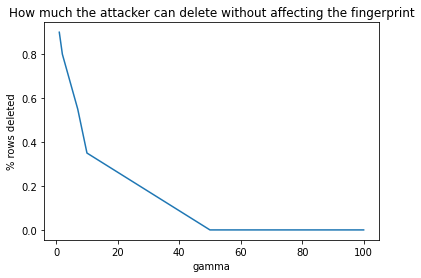

In [77]:
plt.plot(resutls.keys(), [1 - inv_robustness for inv_robustness in resutls.values()])
plt.title('How much the attacker can delete without affecting the fingerprint')
plt.xlabel('gamma')
plt.ylabel('% rows')